# **Actividad 5: Uso de software para búsqueda**

In [ ]:
"""
 Nombre:Victor Abraham Vazquez Alvarez
 Matricula:1925879 Hora Clase:N1
 Título: Actividad 5_dUso de software para búsqueda
"""

**1. Cargar Librerias**

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.15.0


**2. Cargar Datos**

In [120]:
fashion_mnist = keras.datasets.fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [121]:
train_data.shape

(60000, 28, 28)

In [32]:
len(train_labels)

60000

In [33]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [122]:
test_data.shape

(10000, 28, 28)

In [35]:
len(test_labels)

10000

**3. Pre-procesamiento de datos**

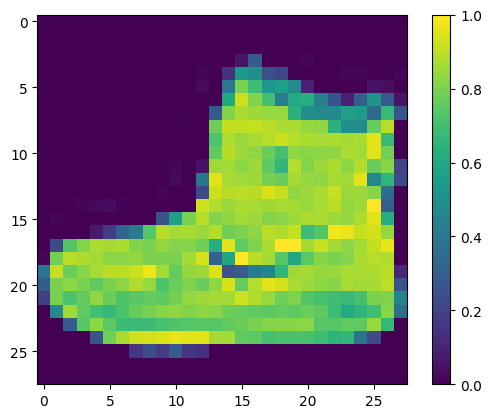

In [131]:
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [132]:
train_data = train_data / 255.0

test_data = test_data / 255.0

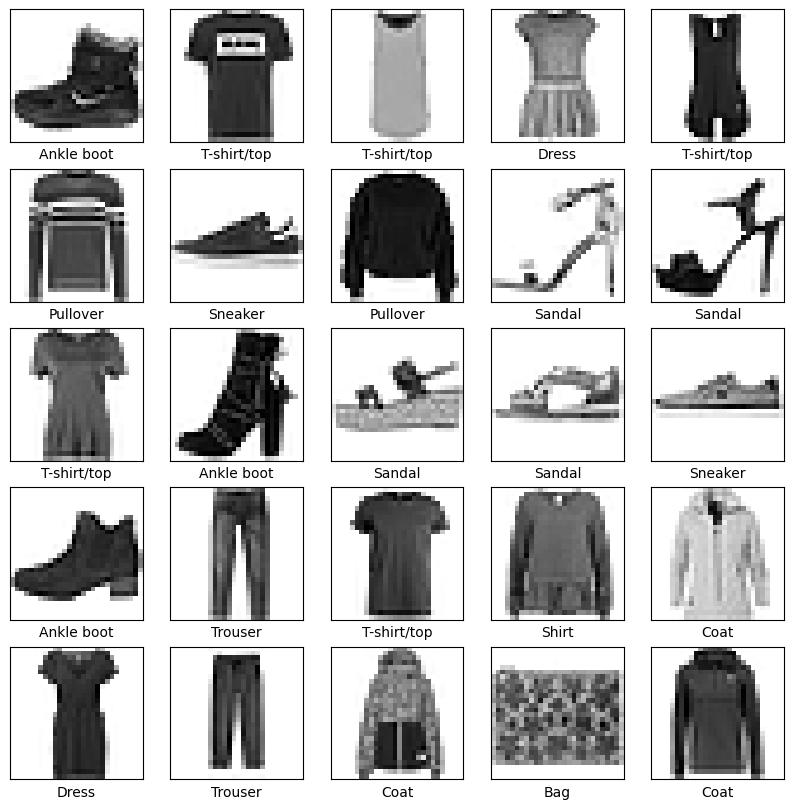

In [133]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**4. Selección y Entrenamiento del Modelo**



In [134]:
# Configuración de Capas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [135]:
# Compilación de Modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [136]:
# Entrenamiento de Modelo
model.fit(train_data, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0736 - accuracy: 0.6687
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6327 - accuracy: 0.7738
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5566 - accuracy: 0.8007
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5147 - accuracy: 0.8172
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4882 - accuracy: 0.8272


In [137]:
# Evaluación del Modelo
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5043 - accuracy: 0.8203 - 581ms/epoch - 2ms/step

Test accuracy: 0.8202999830245972


5. Prueba de Modelo

In [140]:
# Predicciones
predictions = model.predict(test_data[:5])
for i in range(5):
    predicted_label = tf.argmax(predictions[i]).numpy()
    actual_label = test_labels[i]
    print("Predicción:", predicted_label, "Valor real:", actual_label)

1/1 [==============================] - 0s 34ms/step
Predicción: 9 Valor real: 9
Predicción: 2 Valor real: 2
Predicción: 1 Valor real: 1
Predicción: 1 Valor real: 1
Predicción: 6 Valor real: 6


In [142]:
# Gráfica

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

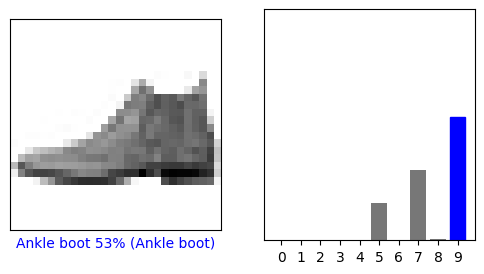

In [143]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

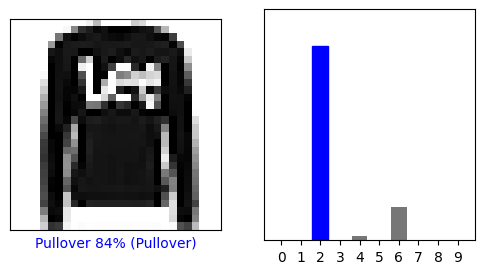

In [146]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

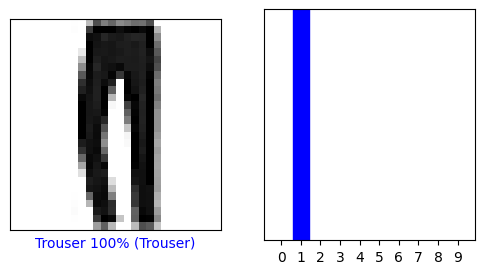

In [148]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

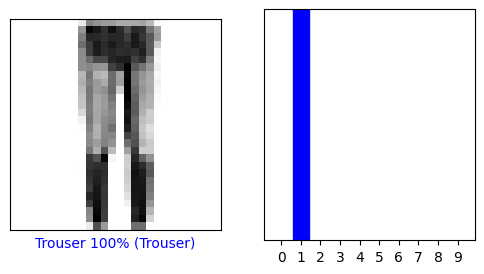

In [149]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

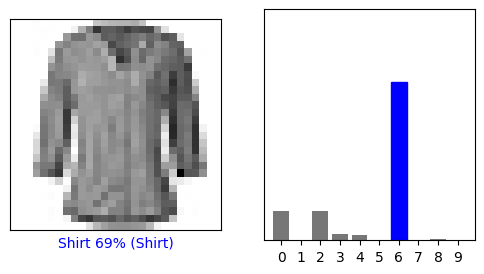

In [150]:
i = 4
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [157]:
# Con el modelo ya entrenado hacer una predicción de una sola imagen
img = test_data[1]

print(img.shape)

(28, 28)


In [158]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [159]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 25ms/step
[[4.9850298e-04 1.4158385e-05 8.4027904e-01 1.6802990e-04 1.6573895e-02
  3.7457868e-09 1.4237502e-01 2.6028101e-12 9.1340771e-05 4.1492458e-09]]


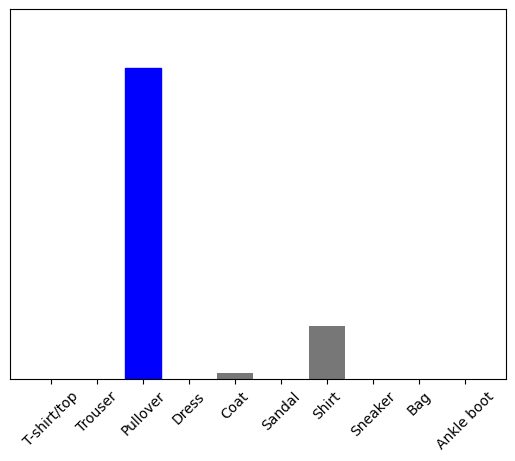

In [160]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)